In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
enc = preprocessing.OneHotEncoder()



from keras.layers import Input, Dense
from keras import regularizers

from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError



from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers
from keras.layers import LSTM


from dask import dataframe as dd 

from xgboost import XGBRegressor

import snowflake.connector

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
import seaborn as sns 
from matplotlib import pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual



#Classifier imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import Ridge 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
conn = snowflake.connector.connect( user = 'sam winter', password = 'Mas1wint', account = 'oe73222.eu-west-2.aws', database = 'SAELSFORCE', schema = 'TEST' )

cs = cur = conn.cursor()

allrows=cs.execute("SELECT * FROM  DEPLAYPEN.SALESFORCEPOC.PROCESSEDSALESFORCE").fetchall()
                 #  WILMDIVISION,WILMORGNAME, CLIENTORG, OPPORTUNITYNAME, STAGENAME, TYPE, FISCALQUARTER, AMOUNT, REVENUE, UNITPRICE, CREDITNOTETOTAL , CREATEDATE, CLOSEDATE, PIPETIME, PIPETIMED, TIMEVAL, CREDITVAL FROM DEPLAYPEN.SALESFORCEPOC.SALESFORCESCALED  ").fetchall()

bas = pd.DataFrame(allrows)

#bas = bas.drop_duplicates()



In [3]:

bas.columns = ['WILMDIVISION','WILMORGNAME','WILMORGNAMECODE','CLIENTORG','OPPORTUNITYNAME','STAGENAME','PRODUCTNAME','FISCALQUARTER','TYPE','CREATEDDATE','CLOSEDATE','AMOUNT','CREDITNOTETOTAL','REVENUE','COST','UNITPRICE','CLOSEDT','PIPETIME','PIPETIMED','TIMEVAL','CREDITVAL','WILMORGNAMECODELE','CLIENTORGLE','OPPORTUNITYNAMELE','PRODUCTNAMELE','STAGENAMELE','FISCALQUARTERLE','TYPELE','CREATEDDATELE','CLOSEDTLE','PIPETIMELE','WILMDIVISIONLE','WILMORGNAMELE','AMOUNTSCALED','CREDITNOTETOTALSCALED','REVENUESCALED','COSTSCALED','UNITPRICESCALED','PIPETIMEDSCALED','TIMEVALSCALED','CREDITVALSCALED','CNLABEL','CLUSTER','CLUSTERCAT']


In [4]:
bas 

,WILMDIVISION,WILMORGNAME,WILMORGNAMECODE,CLIENTORG,OPPORTUNITYNAME,STAGENAME,PRODUCTNAME,FISCALQUARTER,TYPE,CREATEDDATE,...,CREDITNOTETOTALSCALED,REVENUESCALED,COSTSCALED,UNITPRICESCALED,PIPETIMEDSCALED,TIMEVALSCALED,CREDITVALSCALED,CNLABEL,CLUSTER,CLUSTERCAT
0,Risk & Compliance,ICA Commercial Services Ltd,ICT,GP Strategies Egypt LLC,20180927 IH-HSBC Certificate in FCR - Egypt,Closed Won,ICA Certificate in Financial Crime Risk - HSBC...,2019 1,New Business,2016-04-21 10:27:11,...,0.248990,0.470211,0.0,0.068288,0.516640,0.650453,0.381281,155.0,7,H
1,Risk & Compliance,ICA Commercial Services Ltd,ICT,GP Strategies Egypt LLC,20180927 IH-HSBC Certificate in FCR - Egypt,Closed Won,ICA Certificate in Financial Crime Risk - HSBC...,2019 1,New Business,2016-04-21 10:27:11,...,0.248990,0.470211,0.0,0.066516,0.516640,0.650453,0.381281,155.0,7,H
2,Risk & Compliance,International Compliance Association (ICA),ICA,Tony Ford,Tony Ford - ICA - 23/3/2019,Closed Won,ICA Associate Membership,2019 3,Auto-Renewal,2017-03-23 16:46:51,...,0.229141,0.470293,0.0,0.067046,0.471210,0.650292,0.381281,8.0,5,F
3,Risk & Compliance,International Compliance Association (ICA),ICA,Tony Ford,Tony Ford - ICA - 23/3/2019,Closed Won,ICA Associate Membership,2019 3,Auto-Renewal,2017-03-23 16:46:51,...,0.228567,0.470293,0.0,0.067046,0.471210,0.650292,0.380681,1.0,5,F
4,Risk & Compliance,International Compliance Association (ICA),ICA,Ann-Marie Patton,Ann-Marie Patton - ICA - 23/3/2019,Closed Won,ICA (MICA) Membership (12 months),2019 3,Auto-Renewal,2018-03-23 11:54:54,...,0.229266,0.470328,0.0,0.067277,0.382198,0.650297,0.381281,45.0,2,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47603,Risk & Compliance,International Compliance Association (ICA),ICA,Liesl Clothier,Liesl Clothier - Affiliate - 27/10/2018,Closed Won,ICA Affiliate Membership (12 months),2019 2,Auto-Renewal,2016-10-03 12:51:45,...,0.229104,0.470280,0.0,0.066978,0.484945,0.650291,0.381281,7.0,4,E
47604,Risk & Compliance,International Compliance Association (ICA),ICA,John Oridupa,John Oridupa - Affiliate - 27/10/2018,Closed Won,ICA Affiliate Membership (12 months),2019 2,Auto-Renewal,2016-10-27 09:34:20,...,0.229104,0.470280,0.0,0.066978,0.478605,0.650291,0.381281,7.0,4,E
47605,Risk & Compliance,International Compliance Association (ICA),ICA,Marina Shestakova,Marina Shestakova - Affiliate - 3/11/2018,Closed Won,ICA Affiliate Membership (12 months),2019 2,Auto-Renewal,2017-12-01 00:04:45,...,0.229104,0.470280,0.0,0.066978,0.375066,0.650294,0.381281,7.0,9,K
47606,Risk & Compliance,International Compliance Association (ICA),ICA,Pedro Pinheiro,Associate Pedro Pinheiro - 28/9/2018,Closed Won,ICA Associate Membership,2019 1,Auto-Renewal,2016-09-28 10:34:16,...,0.229141,0.470293,0.0,0.067046,0.478870,0.650292,0.381281,31.0,3,D


In [5]:
ing = bas.select_dtypes('int')
fl = bas.select_dtypes('float')
ob = bas.select_dtypes('object')

In [6]:
print('Memory usage before data types are changed:')
bas.info(memory_usage = 'deep') 


            

for i in ing.columns:
        if bas[i].astype('int64').any() > 32767:
            bas[i] =  bas[i].astype('int64', errors='raise')
        elif bas[i].astype('int32').between(127, 32767).any():
            bas[i] =  bas[i].astype('int32', errors='raise')
        else:
            bas[i] =  bas[i].astype('int16', errors='raise')

for i in fl.columns:
        if bas[i].astype('float64').max() > 32767:
            bas[i] =  bas[i].astype('float64', errors='raise')
        elif bas[i].astype('float32').between(127, 32767).any():
            bas[i] =  bas[i].astype('float32', errors='raise')
        else:
            bas[i] =  bas[i].astype('float16', errors='raise')    

for i in ob.columns:
        bas[i] = bas[i].astype('category') 

bnn = bas[bas.CNLABEL.notna()].round(0).astype('int64', errors='ignore')
ban = bas[bas.CNLABEL.isna()]
bas = pd.concat([bnn, ban]) 

print('------------------------------------------------------------------------------------------------------------------------------------')
print('Memory usage after data types are changed:')
bas.info(memory_usage='deep')         


Memory usage before data types are changed:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47608 entries, 0 to 47607
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WILMDIVISION           47608 non-null  object 
 1   WILMORGNAME            47608 non-null  object 
 2   WILMORGNAMECODE        47608 non-null  object 
 3   CLIENTORG              47608 non-null  object 
 4   OPPORTUNITYNAME        47608 non-null  object 
 5   STAGENAME              47608 non-null  object 
 6   PRODUCTNAME            47608 non-null  object 
 7   FISCALQUARTER          47608 non-null  object 
 8   TYPE                   47608 non-null  object 
 9   CREATEDDATE            47608 non-null  object 
 10  CLOSEDATE              47608 non-null  object 
 11  AMOUNT                 47608 non-null  float64
 12  CREDITNOTETOTAL        47608 non-null  float64
 13  REVENUE                47608 non-null  float64
 14  COST      

In [7]:
allClients = (bas.CLIENTORG.unique()) 

allWilm = (bas.WILMORGNAME.unique()) 


allType = (bas.TYPE.unique()) 

allWeeks = 0

defaultTargetProf =  1265.88

defaultTargetPecent=  120

allOpps = bas.OPPORTUNITYNAME.unique()

In [8]:
bas['week'] = bas.PIPETIMED/7

<AxesSubplot:>

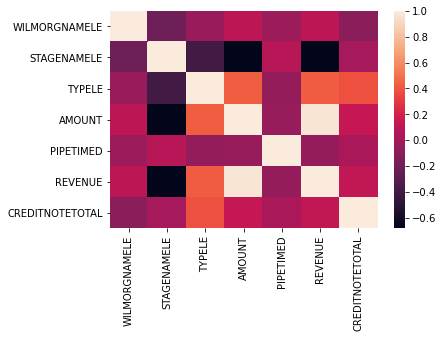

In [9]:
bt = bas[['WILMORGNAMELE', 'STAGENAMELE',
       'TYPELE', 'AMOUNT', 'PIPETIMED', 'REVENUE', 'CREDITNOTETOTAL']]

corr = bt.corr(method ='kendall')

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)     

In [10]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

toCorr = bas[['WILMORGNAMELE', 'STAGENAMELE','TYPELE', 'AMOUNT', 'PIPETIMED', 'REVENUE', 'CREDITNOTETOTAL']]
corr = toCorr.corr(method ='kendall')

corr.style.background_gradient(cmap, axis=1)\
.set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
.set_caption("Hover to magify")\
.set_precision(2)\
.set_table_styles(magnify())

    



,WILMORGNAMELE,STAGENAMELE,TYPELE,AMOUNT,PIPETIMED,REVENUE,CREDITNOTETOTAL
WILMORGNAMELE,1.00,-0.21,-0.03,0.11,-0.03,0.10,-0.10
STAGENAMELE,-0.21,1.00,-0.39,-0.68,0.08,-0.68,0.01
TYPELE,-0.03,-0.39,1.00,0.43,-0.05,0.43,0.38
AMOUNT,0.11,-0.68,0.43,1.00,-0.05,0.97,0.13
PIPETIMED,-0.03,0.08,-0.05,-0.05,1.00,-0.06,0.03
REVENUE,0.10,-0.68,0.43,0.97,-0.06,1.00,0.12
CREDITNOTETOTAL,-0.10,0.01,0.38,0.13,0.03,0.12,1.00


In [11]:
bas = bas.sample(frac = 0.05)

In [ ]:
pd.set_option('display.max_rows',100)
#Cell > All Outputs > Toggle Scrolling (On the Menu Bar) to show entire output of function

def Above20orXIncrease(ClientOrg = allClients, Type = allType, MinWeeksToComplete = 0,  WILMORGNAME = allWilm, Opportunities = allOpps, TargetMinRevenue = -99999999, TargetMinPercentRevenue = -9999999):
    
    OrgMask = bas.CLIENTORG.isin(ClientOrg)
    TypeMask = bas.TYPE.isin(Type)
    PipeMask = bas.week > MinWeeksToComplete
    WILMORGNAMEMask = bas.WILMORGNAME.isin(WILMORGNAME)
    RevenueMask =  bas.REVENUE > TargetMinRevenue 
    PercentMask =  bas.REVENUE > (1054.9 * (TargetMinPercentRevenue/100)) 
    OppMask =  bas.OPPORTUNITYNAME.isin(Opportunities)

    
    bashighProf = bas[(OrgMask) & (TypeMask) & (PipeMask)  & (WILMORGNAMEMask) & (RevenueMask) & (PercentMask) & (OppMask)] 

    y = bas[(OrgMask) & (TypeMask) & (PipeMask)  & (WILMORGNAMEMask)].REVENUE.mean()
    yi = bas.REVENUE.mean() 
    
    Percentagediff = ((y-yi) / yi * 100) 
    print('Likely Revenue Given Input:', round(y,2), '    Average Opportunity Revenue:', round(yi,2), 
          '    Average vs Likely (% Difference):', round(Percentagediff, 2), )
    
  
    PossibleWILMORGNAMEs = bashighProf.groupby(['WILMORGNAME']).agg({'REVENUE': ['mean']}).reset_index()
    PossibleWILMORGNAMEs = pd.DataFrame(PossibleWILMORGNAMEs)
    PossibleWILMORGNAMEs.columns = ['Wilm Orgs Meeting Targets, ranked by revenue', 'Average Revenue']
    PossibleWILMORGNAMEs =  PossibleWILMORGNAMEs.sort_values(by = 'Average Revenue',ascending=False)
    
    PossibleClientOrgs = bashighProf.groupby(['CLIENTORG']).agg({'REVENUE': ['mean']}).reset_index()
    PossibleClientOrgs = pd.DataFrame(PossibleClientOrgs)
    PossibleClientOrgs.columns = ['Clients Meeting Targets, ranked', 'Average Revenue']
    PossibleClientOrgs =  PossibleClientOrgs.sort_values(by = 'Average Revenue',ascending=False)
    
    PossibleTypes = bashighProf.groupby(['TYPE']).agg({'REVENUE': ['mean']}).reset_index()
    PossibleTypes = pd.DataFrame(PossibleTypes)
    PossibleTypes.columns = ['Opportunity types meeting Targets, ranked', 'Average Revenue']
    PossibleTypes =  PossibleTypes.sort_values(by = 'Average Revenue',ascending=False)
    
    PossibleDivisions = bashighProf.groupby(['WILMDIVISION']).agg({'REVENUE': ['mean']}).reset_index()
    PossibleDivisions = pd.DataFrame(PossibleDivisions)
    PossibleDivisions.columns = ['Divisions Meeting Targets, ranked', 'Average Revenue']
    PossibleDivisions =  PossibleDivisions.sort_values(by = 'Average Revenue',ascending=False)
    
    

    
      
    print("--------------------------------------------------------------------------------------------------------- ")
    print('Features that have given a Revenue above target absolute and percentage revenue with selected dimensions:'),
    display(PossibleWILMORGNAMEs), display(PossibleTypes), display(PossibleDivisions), display(PossibleClientOrgs)

    print("--------------------------------------------------------------------------------------------------------- ")
    print('Unique combinations of features with a Revenue above set revenue targets and within combinations:'),
       
    
    AllCombinations = bas.sample(frac=.3).groupby(['WILMDIVISION','WILMORGNAME', 'CLIENTORG', 'TYPE']).agg({'REVENUE': ['mean', 'std'], 'PIPETIMED': 'mean'}).reset_index()#, 'PIPETIMED': ['mean']})
    AllCombinations = pd.DataFrame(AllCombinations)

    AllCombinations.columns = ['WILMDIVISION','WILMORGNAME', 'CLIENTORG', 'TYPE', 'Average Revenue', 'Avg Revenue Standard Deviation', 'Average Open To Close Days']#, 'Avg Revenue Max']
    display(AllCombinations.sort_values(by = 'Average Revenue',ascending=False))
    
    print("--------------------------------------------------------------------------------------------------------- ")
    print('Correlaton between selected dimensions converted to numeric format, and measures, with selected dimensions:'),
    
    toCorr = bashighProf[['WILMORGNAMELE', 'STAGENAMELE','TYPELE', 'AMOUNT', 'PIPETIMED', 'REVENUE', 'CREDITNOTETOTAL']]
    corr = toCorr.corr(method ='kendall')
    
    
    
#     cmap=sns.diverging_palette(5, 250, as_cmap=True)


#     TableStyles = [dict(selector="th",
#                      props=[("font-size", "7pt")]),
#                 dict(selector="td",
#                      props=[('padding', "0em 0em")]),
#                 dict(selector="th:hover",
#                      props=[("font-size", "12pt")]),
#                 dict(selector="tr:hover td:hover",
#                      props=[('max-width', '200px'),
#                             ('font-size', '12pt')])
#     ]

   
#     display (corr.style.background_gradient(cmap, axis=1)\
#     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#     .set_caption("Hover to magify")\
#     .set_precision(2)\
#     .set_table_styles(TableStyles)) 
    

    


    
    
    
Above20orXIncrease(TargetMinPercentRevenue = 130, MinWeeksToComplete = 40)#, WILMORGNAME = ['ICA']) #Opportunities=['Credit Of W-1113094 Various HMRC remaining licenses'], , TargetMinRevenue = 1265.88,  TargetMinPercentRevenue = 120) 

Likely Revenue Given Input: 4196.4     Average Opportunity Revenue: 3543.89     Average vs Likely (% Difference): 18.41
--------------------------------------------------------------------------------------------------------- 
Features that have given a Revenue above target absolute and percentage revenue with selected dimensions:


,"Wilm Orgs Meeting Targets, ranked by revenue",Average Revenue
22,Wilmington Healthcare Ltd,188998.800000
10,ICTA Malaysia,154949.375000
2,Adkins Matchett & Toy (Hong Kong) Limited,23749.500000
9,ICA Commercial Services Ltd,17513.697318
15,International Compliance Training Academy Pte Ltd,15863.660714
14,International Compliance Training (ME) Ltd,15279.235294
4,CLT International Ltd,6466.000000
24,Wilmington Publishing & Information Ltd,6199.000000
0,ARK Conferences Ltd,5000.000000
13,International Compliance Association (ICA),3795.777778


,"Opportunity types meeting Targets, ranked",Average Revenue
3,New Business - Existing Customer,57775.000000
4,Renewal,34675.333333
2,New Business,20525.591029
6,Transfer/Reissue,20235.000000
5,Repeat Business,8568.666667
0,Auto-Renewal,6199.000000
1,Credit,NaN


,"Divisions Meeting Targets, ranked",Average Revenue
0,Healthcare,136219.857143
2,Risk & Compliance,19221.884718
1,Professional,2154.833333


,"Clients Meeting Targets, ranked",Average Revenue
11044,Napp Pharmaceuticals Limited,416173.000000
1396,Asian Institute of Chartered Bankers,173623.333333
11930,Oversea-Chinese Banking Corporation Limited,151800.000000
1546,B Braun Medical Limited,96446.000000
1632,BPP Professional Education Ltd,84966.230769
...,...,...
17156,sher mahmud saika,NaN
17157,sherian Emmanuel,NaN
17158,teresa pereira,NaN
17159,thomas coleman,NaN


--------------------------------------------------------------------------------------------------------- 
Unique combinations of features with a Revenue above set revenue targets and within combinations:


In [ ]:
def CorMap(FeaturesToCorrelate = bas.select_dtypes(np.number).columns):

    cmap=sns.diverging_palette(5, 250, as_cmap=True)

    toCorr = bas[FeaturesToCorrelate]
    corr = toCorr.corr(method ='kendall')

    TableStyles = [dict(selector="th",
                     props=[("font-size", "7pt")]),
                dict(selector="td",
                     props=[('padding', "0em 0em")]),
                dict(selector="th:hover",
                     props=[("font-size", "12pt")]),
                dict(selector="tr:hover td:hover",
                     props=[('max-width', '200px'),
                            ('font-size', '12pt')])
    ]

   
    return corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(TableStyles)
    
    
    
 
# CorMap(['WILMDIVISIONLE', 'WILMORGNAMELE', 'CLIENTORGLE',
#        'OPPORTUNITYNAMELE', 'STAGENAMELE', 'TYPELE', 'AMOUNT', 'REVENUE',
#        'UNITPRICE', 'CREDITNOTETOTAL', 'FISCALQUARTER', 'CREATEDATE',
#        'CLOSEDATE', 'PIPETIME', 'PIPETIMED', 'TIMEVAL', 'CREDITVAL',
#        'TIMEVALSCALED', 'PIPETIMEDSCALED', 'CREDITNOTESCALED', 'AMOUNTSCALED',
#        'CREDITVALSCALED', 'CNLABEL', 'CLUSTER', 'CLUSTERCAT', 'week'])

CorMap() 

In [ ]:
def func1(x):
    return 5*x
interact(func1, x=10);


In [ ]:
bas.REVENUE.max() 

In [ ]:
w = interactive(Above20orXIncrease, TargetMinPercentRevenue = widgets.IntSlider(min=-665659.0, max=750000.0, value=25, step=10000)) 
#                         b=widgets.IntSlider(min=10, max=50, value=25, step=2),
#                         c=widgets.IntSlider(min=10, max=50, value=25, step=2),
#                        )
display(w)
# Above20orXIncrease(TargetMinPercentRevenue = 130, MinWeeksToComplete = 40)#, WILMORGNAME = ['ICA']) #Opportunities=['Credit Of W-1113094 Various HMRC remaining licenses'], , TargetMinRevenue = 1265.88,  TargetMinPercentRevenue = 120)                

# Above20orXIncrease(TargetMinPercentRevenue = 130, 
#                    MinWeeksToComplete = 40)#, WILMORGNAME = ['ICA']) #Opportunities=['Credit Of W-1113094 Various HMRC remaining licenses'], , TargetMinRevenue = 1265.88,  TargetMinPercentRevenue = 120) 

In [ ]:
interact(CorMap, FeaturesToCorrelate=['WILMDIVISIONLE', 'WILMORGNAMELE', 'CLIENTORGLE', 'OPPORTUNITYNAMELE',
       'STAGENAMELE', 'TYPELE', 'AMOUNT', 'REVENUE', 'UNITPRICE',
       'CREDITNOTETOTAL', 'PIPETIME', 'PIPETIMED', 'TIMEVAL', 'CREDITVAL',
       'TIMEVALSCALED', 'PIPETIMEDSCALED', 'CREDITNOTESCALED', 'AMOUNTSCALED',
       'CREDITVALSCALED', 'CNLABEL', 'CLUSTER', 'week'])


In [ ]:
bas.columns 

In [ ]:
jupyter nbconvert --to interact a_notebook.ipynb
